# WEB SCRAPER.
Curso Platzi. Ingeniería de Datos.
Fecha: 31.03.21

In [1]:
# Dependencias
import pandas as pd
from urllib.parse import urlparse

## Lectura de datos

In [2]:
# Lectura de datos recopilados del periódico "El Universal"
el_universal = pd.read_csv("extract/eluniversal_2021_03_31_articles.csv")
el_universal.head()

,body,title,url
0,\r\nEl excandidato presidencial del desapareci...,"Gabriel Quadri, ahora candidato a diputado, re...",https://www.eluniversal.com.mx/nacion/gabriel-...
1,\r\n\r\nLos memes de Ángela Aguilar han evoluc...,Piden dinero con meme de Ángela Aguilar,https://www.eluniversal.com.mx/espectaculos/pi...
2,"\r\n\r\nAsí en crudo, sin filtros, sin context...",NaN,https://eluniversal.com.mx/opinion/alejandro-h...
3,\r\nDijo el Presidente ayer que las acusacione...,NaN,https://eluniversal.com.mx/opinion/raul-rodrig...
4,\r\n\r\nEl desafuero del gobernador de Tamauli...,"Francisco García Cabeza de Vaca, un desafuero ...",https://www.eluniversal.com.mx/nacion/politica...


In [3]:
# Estableciendo uid
el_universal["news_site_uid"] = "eluniversal"
el_universal.head()

,body,title,url,news_site_uid
0,\r\nEl excandidato presidencial del desapareci...,"Gabriel Quadri, ahora candidato a diputado, re...",https://www.eluniversal.com.mx/nacion/gabriel-...,eluniversal
1,\r\n\r\nLos memes de Ángela Aguilar han evoluc...,Piden dinero con meme de Ángela Aguilar,https://www.eluniversal.com.mx/espectaculos/pi...,eluniversal
2,"\r\n\r\nAsí en crudo, sin filtros, sin context...",NaN,https://eluniversal.com.mx/opinion/alejandro-h...,eluniversal
3,\r\nDijo el Presidente ayer que las acusacione...,NaN,https://eluniversal.com.mx/opinion/raul-rodrig...,eluniversal
4,\r\n\r\nEl desafuero del gobernador de Tamauli...,"Francisco García Cabeza de Vaca, un desafuero ...",https://www.eluniversal.com.mx/nacion/politica...,eluniversal


In [4]:
# Obteniendo host de las urls
el_universal["host"] = el_universal["url"].apply(lambda url: urlparse(url).netloc)
el_universal.sample(5)

,body,title,url,news_site_uid,host
23,"\r\nEl presidente de El Salvador, Nayyib Bukel...","Tras revelarse abusos a Victoria, Bukele cuest...",https://www.eluniversal.com.mx/mundo/tras-reve...,eluniversal,www.eluniversal.com.mx
15,\r\nGerardo Martino lleva 24 partidos dirigido...,NaN,https://eluniversal.com.mx/opinion/gerardo-vel...,eluniversal,eluniversal.com.mx
12,\r\nMilitantes de Morena pidieron a la Comisió...,Piden inclusión de Porfirio Muñoz Ledo a lista...,https://www.eluniversal.com.mx/elecciones/pide...,eluniversal,www.eluniversal.com.mx
14,\r\n\r\n\r\n \r\n\r\n\r\n \r\n,La Mañanera de AMLO - 31 de marzo,https://www.eluniversal.com.mx/nacion/la-manan...,eluniversal,www.eluniversal.com.mx
28,\r\nÁngeles exterminadores. Fue el propio pres...,NaN,https://eluniversal.com.mx/opinion/jose-carren...,eluniversal,eluniversal.com.mx


In [5]:
# Revisando los diferentes tipos de host
el_universal["host"].value_counts()

www.eluniversal.com.mx    30
eluniversal.com.mx        12
Name: host, dtype: int64

## Limpieza de datos

In [6]:
# Identificando datos faltantes
missing_titles_mask = el_universal["title"].isna()
el_universal[missing_titles_mask].sample(5)


,body,title,url,news_site_uid,host
35,\r\nAdemás del repudio y la indignación nacion...,NaN,https://eluniversal.com.mx/opinion/mario-maldo...,eluniversal,eluniversal.com.mx
20,\r\n\r\nYo no sé cuál de las frases es más des...,NaN,https://eluniversal.com.mx/opinion/ricardo-roc...,eluniversal,eluniversal.com.mx
2,"\r\n\r\nAsí en crudo, sin filtros, sin context...",NaN,https://eluniversal.com.mx/opinion/alejandro-h...,eluniversal,eluniversal.com.mx
8,\r\nEl presidente Andrés Manuel López Obrador ...,NaN,https://eluniversal.com.mx/opinion/ana-paula-o...,eluniversal,eluniversal.com.mx
34,\r\n\r\nVuelven a sonar los tambores convocand...,NaN,https://eluniversal.com.mx/opinion/francisco-s...,eluniversal,eluniversal.com.mx


In [7]:
# Rellenando datos faltantes a partir de información escondida en las urls
missing_titles = (el_universal[missing_titles_mask]["url"]
                        .str.extract(r"(?P<missing_titles>[^/]+)$")
                        .applymap(lambda title: title.split("-"))
                        .applymap(lambda title_word_list: " ".join(title_word_list))
                )

missing_titles.sample(5)

,missing_titles
15,chucky lozano salva al tata
9,un ano de la dislocacion
34,suenan los tambores convocando una reforma fiscal
26,conozco las necesidades del sector empresarial...
29,empresas aguantan presion de amlo


In [8]:
el_universal.loc[missing_titles_mask, "title"] = missing_titles.loc[:, "missing_titles"]
el_universal.head()

,body,title,url,news_site_uid,host
0,\r\nEl excandidato presidencial del desapareci...,"Gabriel Quadri, ahora candidato a diputado, re...",https://www.eluniversal.com.mx/nacion/gabriel-...,eluniversal,www.eluniversal.com.mx
1,\r\n\r\nLos memes de Ángela Aguilar han evoluc...,Piden dinero con meme de Ángela Aguilar,https://www.eluniversal.com.mx/espectaculos/pi...,eluniversal,www.eluniversal.com.mx
2,"\r\n\r\nAsí en crudo, sin filtros, sin context...",los mexicanos quieren un gobierno militar,https://eluniversal.com.mx/opinion/alejandro-h...,eluniversal,eluniversal.com.mx
3,\r\nDijo el Presidente ayer que las acusacione...,militarizar al pais las razones de amlo,https://eluniversal.com.mx/opinion/raul-rodrig...,eluniversal,eluniversal.com.mx
4,\r\n\r\nEl desafuero del gobernador de Tamauli...,"Francisco García Cabeza de Vaca, un desafuero ...",https://www.eluniversal.com.mx/nacion/politica...,eluniversal,www.eluniversal.com.mx


In [9]:
# Limpiezas adicionales del dataset.
# Estableciendo índices únicos.

import hashlib

uids = (el_universal
            .apply(lambda row: hashlib.md5(bytes(row["url"].encode())), axis=1)
            .apply(lambda hash_object: hash_object.hexdigest())
        )

el_universal["uid"] = uids
el_universal.set_index("uid", inplace=True)
el_universal.sample(5)

,body,title,url,news_site_uid,host
uid,,,,,
821a0854875fffbcce0a75f1ca438bc4,\r\nDijo el Presidente ayer que las acusacione...,militarizar al pais las razones de amlo,https://eluniversal.com.mx/opinion/raul-rodrig...,eluniversal,eluniversal.com.mx
6f0148dadacd5e2e241e076ea0cdb784,"\r\n\r\nPaciente y con buen humor, luego del e...","Mariana Garza y ""Sugar"" se confiesan",https://www.eluniversal.com.mx/espectaculos/ma...,eluniversal,www.eluniversal.com.mx
b591938c8f80d98dbf70877667a26343,"\r\nManuel Bartlett Díaz, director general de ...","Un show, los amparos para frenar la reforma a ...",https://www.eluniversal.com.mx/nacion/bartlett...,eluniversal,www.eluniversal.com.mx
c9212db02dd28eb1e891e4e3609336f5,\r\n\r\nVuelven a sonar los tambores convocand...,suenan los tambores convocando una reforma fiscal,https://eluniversal.com.mx/opinion/francisco-s...,eluniversal,eluniversal.com.mx
f6853f9bd60296a158ede9ab818ba282,\r\nQuien se alzó en 2018 con la victoria y ll...,universidad del despotismo,https://eluniversal.com.mx/opinion/ignacio-mor...,eluniversal,eluniversal.com.mx


In [10]:
# Eliminando los símbolos de saltos de línea y otros de los cuerpos de textos
stripped_body = (el_universal
                    .apply(lambda row: row["body"], axis=1)
                    .apply(lambda body: list(body))
                    .apply(lambda letters: list(map(lambda letter: letter.replace("\n", ""), letters)))
                    .apply(lambda letters: list(map(lambda letter: letter.replace("\r", ""), letters)))
                    .apply(lambda letters: "".join(letters))
                )

el_universal["body"] = stripped_body
el_universal.sample(5)

,body,title,url,news_site_uid,host
uid,,,,,
0005cfa68344f262243ef83b7c91169e,Yo no sé cuál de las frases es más descriptiva...,bartra el fracaso de amlo,https://eluniversal.com.mx/opinion/ricardo-roc...,eluniversal,eluniversal.com.mx
f009c45c9fa0f4a253f045015fbc6531,"A través de fundaciones, compañas de concienti...","Amor y compromiso por los animales, estos famo...",https://www.eluniversal.com.mx/espectaculos/am...,eluniversal,www.eluniversal.com.mx
45c9e098614b1d7b207ef1679feaed6f,"“Como director, estuve cargando muebles, ayuda...",El cine no se doblega ante la pandemia,https://www.eluniversal.com.mx/espectaculos/ci...,eluniversal,www.eluniversal.com.mx
ad1743dda06235567b7774f209a85d43,Militantes de Morena pidieron a la Comisión Na...,Piden inclusión de Porfirio Muñoz Ledo a lista...,https://www.eluniversal.com.mx/elecciones/pide...,eluniversal,www.eluniversal.com.mx
37c90ce97782951baf4818e0da8af262,"De acuerdo con don Manuel Bartlett, director d...",empresas aguantan presion de amlo,https://eluniversal.com.mx/opinion/periodistas...,eluniversal,eluniversal.com.mx


In [11]:
# Verificando y eliminando datos duplicados
el_universal.drop_duplicates(subset=["title"], keep="first", inplace=True)
el_universal.sample(5)

,body,title,url,news_site_uid,host
uid,,,,,
bd9dcae640ba4b1b73f8fa1428f14ab4,Bruselas.— En la Iglesia de Notre-Dame aux Ric...,Misas web: iglesia se adapta a pandemia,https://www.eluniversal.com.mx/mundo/misas-web...,eluniversal,www.eluniversal.com.mx
5a75cc26eaf8e145d5ce577c1022a3db,Luego de que el Departamento de Estado de los ...,"“Es el refrito de mentiras”, responde Sanjuana...",https://www.eluniversal.com.mx/cultura/es-el-r...,eluniversal,www.eluniversal.com.mx
45c9e098614b1d7b207ef1679feaed6f,"“Como director, estuve cargando muebles, ayuda...",El cine no se doblega ante la pandemia,https://www.eluniversal.com.mx/espectaculos/ci...,eluniversal,www.eluniversal.com.mx
6de25dc16dd238c1f1be3704dc1f2ad0,Oaxaca de Juárez.– La vacunación contra Covid-...,En esta comunidad de Oaxaca llegaron primero l...,https://www.eluniversal.com.mx/estados/en-esta...,eluniversal,www.eluniversal.com.mx
52a47e90858ba2ec6aaa7fda0a025436,La Comisión Interamericana de Derechos Humanos...,ONU y CIDH reclaman trato mexicano a migrantes,https://www.eluniversal.com.mx/nacion/onu-y-ci...,eluniversal,www.eluniversal.com.mx


## Enriquecimiento de datos

In [12]:
# Tokenizando títulos y textos
import nltk
from nltk.corpus import stopwords
nltk.download("punkt")
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\josue\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\josue\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
stop_words = set(stopwords.words("spanish"))

def tokenize_column(df, column_name):
    return (df
                .dropna()
                .apply(lambda row: nltk.word_tokenize(row[column_name]), axis=1)
                .apply(lambda tokens: list(filter(lambda token: token.isalpha(), tokens)))
                .apply(lambda tokens: list(map(lambda token: token.lower(), tokens)))
                .apply(lambda word_list: list(filter(lambda word: word not in stop_words, word_list)))
                .apply(lambda valid_word_list: len(valid_word_list))
            )

el_universal["n_tokens_title"] = tokenize_column(el_universal, "title")
el_universal["n_tokens_body"] = tokenize_column(el_universal, "body")

## Tabla final

In [14]:
el_universal.sample(5)

,body,title,url,news_site_uid,host,n_tokens_title,n_tokens_body
uid,,,,,,,
72845e40f0d484f449bd68286972f642,Con una economía en recuperación y a casi un a...,Gobierno recauda 15 mil mdp menos de lo esperado,https://www.eluniversal.com.mx/cartera/gobiern...,eluniversal,www.eluniversal.com.mx,6,278
6f0148dadacd5e2e241e076ea0cdb784,"Paciente y con buen humor, luego del estreno d...","Mariana Garza y ""Sugar"" se confiesan",https://www.eluniversal.com.mx/espectaculos/ma...,eluniversal,www.eluniversal.com.mx,4,199
04c41c2fe240b8c62a89be78d74ae33c,El excandidato presidencial del desaparecido P...,"Gabriel Quadri, ahora candidato a diputado, re...",https://www.eluniversal.com.mx/nacion/gabriel-...,eluniversal,www.eluniversal.com.mx,8,87
52a47e90858ba2ec6aaa7fda0a025436,La Comisión Interamericana de Derechos Humanos...,ONU y CIDH reclaman trato mexicano a migrantes,https://www.eluniversal.com.mx/nacion/onu-y-ci...,eluniversal,www.eluniversal.com.mx,6,302
3338c35f3fd55fa03281b84c3b94cd67,"No fue, por mucho, la selección que pueda comp...",México derrotó a Honduras en penaltis y es cam...,https://www.eluniversal.com.mx/universal-depor...,eluniversal,www.eluniversal.com.mx,6,184


## Análisis descriptivo de datasets

In [15]:
clean_eluniversal = pd.read_csv("transform/clean_eluniversal_2021_03_31_articles.csv")
clean_elpais = pd.read_csv("transform/clean_elpais_2021_03_31_articles.csv")

In [16]:
# Revisión de datos estadísticos
clean_eluniversal.describe()

,n_tokens_title,n_tokens_body
count,42.000000,42.000000
mean,5.642857,271.523810
std,2.069776,158.566788
min,2.000000,0.000000
25%,4.000000,179.500000
50%,6.000000,242.000000
75%,7.000000,320.000000
max,10.000000,745.000000


In [17]:
clean_elpais.describe()

,n_tokens_title,n_tokens_body
count,84.000000,84.000000
mean,25.476190,541.333333
std,12.241029,386.742757
min,12.000000,70.000000
25%,19.000000,313.000000
50%,21.500000,431.000000
75%,27.000000,592.750000
max,67.000000,2266.000000


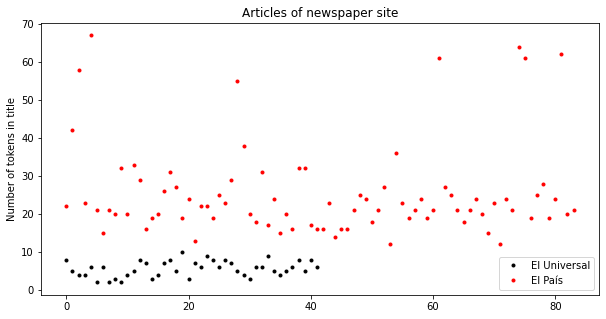

In [18]:
# Visualización de resultados
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
clean_eluniversal["n_tokens_title"].plot(style="k.")
clean_elpais["n_tokens_title"].plot(style="r.")
plt.ylabel("Number of tokens in title")
plt.title("Articles of newspaper site")
plt.legend(["El Universal", "El País"])
plt.show()

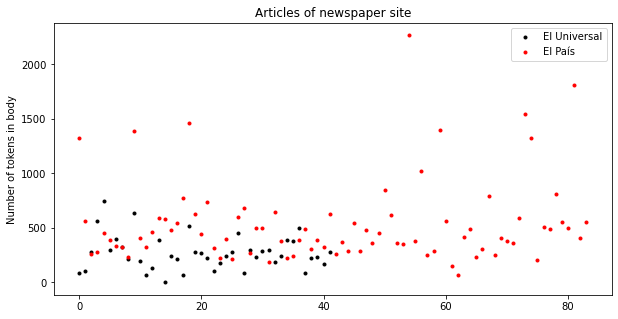

In [19]:
plt.figure(figsize=(10,5))
clean_eluniversal["n_tokens_body"].plot(style="k.")
clean_elpais["n_tokens_body"].plot(style="r.")
plt.ylabel("Number of tokens in body")
plt.title("Articles of newspaper site")
plt.legend(["El Universal", "El País"])
plt.show()

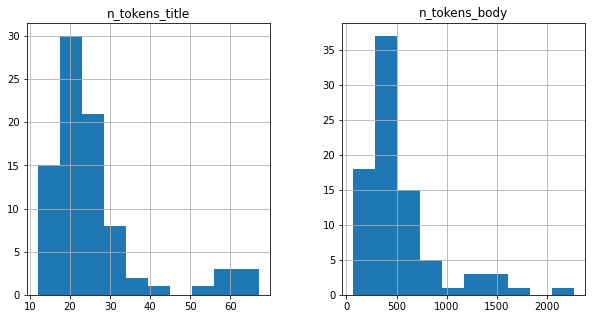

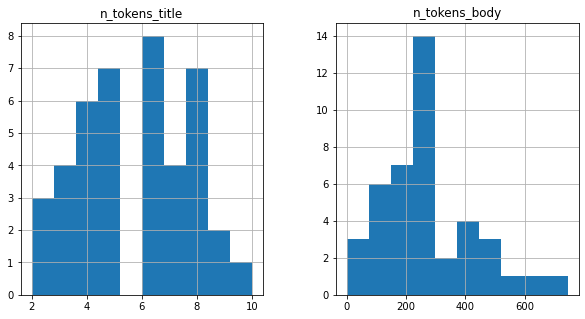

In [20]:
all_newspapers = pd.concat([clean_eluniversal, clean_elpais])
grouped = all_newspapers.groupby(["newspaper_uid"])

grouped.hist(figsize=(10, 5))
plt.show()

In [21]:
grouped["n_tokens_body"].agg(["min", "mean", "max"])

,min,mean,max
newspaper_uid,,,
elpais,70,541.333333,2266
eluniversal,0,271.523810,745
